In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
img = cv2.imread('images/img1.jpg', 0)
print(img)

[[172 173 174 ... 113 113 113]
 [173 174 175 ... 111 111 111]
 [175 176 177 ... 107 107 107]
 ...
 [172 172 171 ...  45  45  45]
 [170 170 170 ...  41  47  54]
 [160 148 139 ...  52  57  60]]


In [3]:
img.shape

(137, 367)

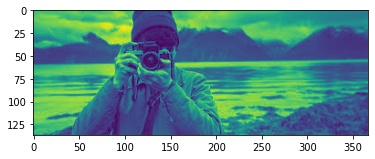

In [4]:
plt.imshow(img)

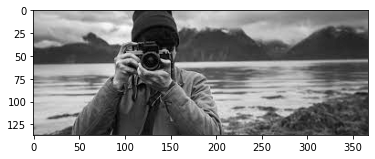

In [5]:
plt.imshow(img, cmap = 'gray')

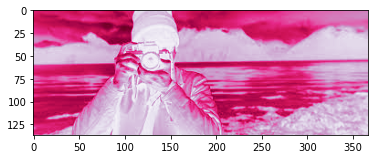

In [6]:
plt.imshow(img, cmap = 'PuRd')

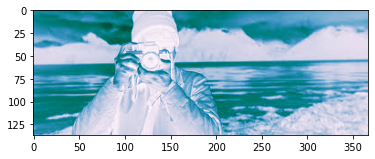

In [7]:
plt.imshow(img, cmap = 'PuBuGn')

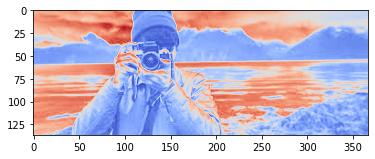

In [8]:
plt.imshow(img, cmap = 'coolwarm')

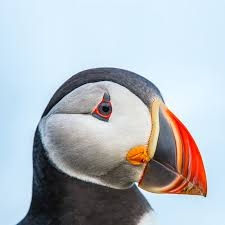

In [10]:
Image('images/img2.jpg')

In [12]:
img2 = cv2.imread('images/img2.jpg', 1)
img2.shape

(225, 225, 3)

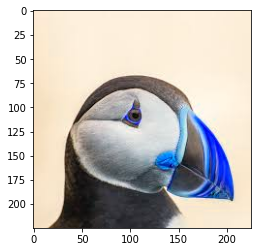

In [13]:
plt.imshow(img2)

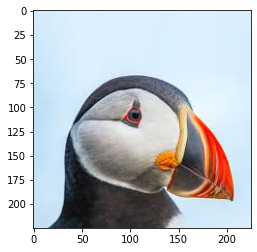

In [14]:
img2_reversed = img2[:, :, ::-1]
plt.imshow(img2_reversed)

## Splitting and Merging

Text(0.5, 1.0, 'Merge Output')

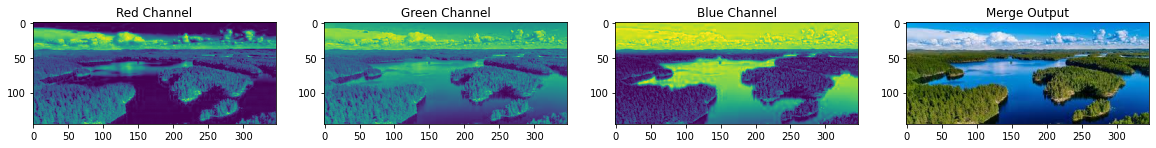

In [16]:
scenary_bgr = cv2.imread('images/scenary.jpg', 1)
b,g,r = cv2.split(scenary_bgr)

plt.figure(figsize=[20,5]) 
plt.subplot(141) 
plt.imshow(r) 
plt.title('Red Channel')

plt.subplot(142) 
plt.imshow(g) 
plt.title('Green Channel') 

plt.subplot(143) 
plt.imshow(b) 
plt.title('Blue Channel')

img_merged = cv2.merge((b,g,r))
plt.subplot(144)
plt.imshow(img_merged[:,:,::-1])
plt.title('Merge Output')


## BGR to RGB

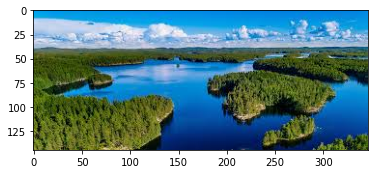

In [17]:
scenary_rgb = cv2.cvtColor(scenary_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(scenary_rgb)

Text(0.5, 1.0, 'Original Image')

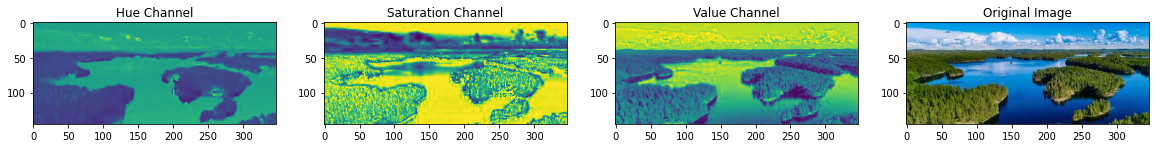

In [18]:
scenary_hsv = cv2.cvtColor(scenary_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(scenary_hsv)
plt.figure(figsize=[20,5]) 

plt.subplot(141)
plt.imshow(h)
plt.title('Hue Channel')

plt.subplot(142)
plt.imshow(s) 
plt.title('Saturation Channel') 

plt.subplot(143) 
plt.imshow(v) 
plt.title('Value Channel')

plt.subplot(144) 
plt.imshow(scenary_rgb) 
plt.title('Original Image')


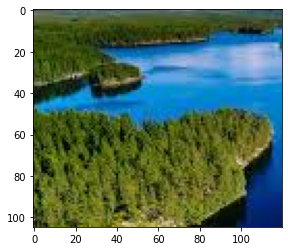

In [19]:
plt.imshow(scenary_rgb[40:200, 30: 150])

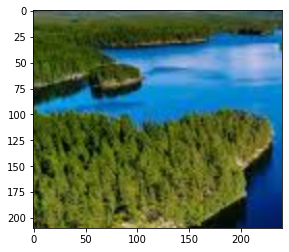

In [20]:
temp = scenary_rgb[40:200, 30: 150]
temp_zoom = cv2.resize(temp, None, fx=2, fy=2)
plt.imshow(temp_zoom)

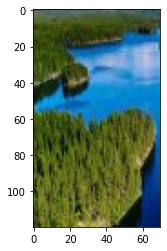

In [21]:
temp_specific = cv2.resize(temp, (70,120), interpolation = cv2.INTER_AREA)
plt.imshow(temp_specific)

Text(0.5, 1.0, 'Original Image')

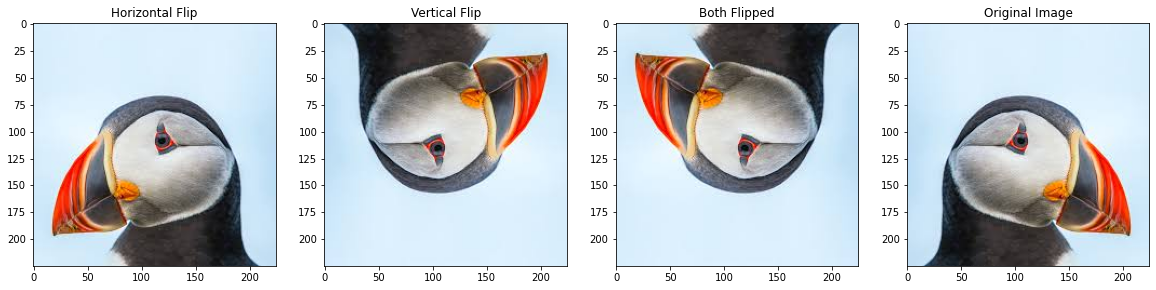

In [22]:
img2_flip_hor = cv2.flip(img2_reversed, 1)
img2_flip_ver = cv2.flip(img2_reversed, 0)
img2_flip_both = cv2.flip(img2_reversed, -1)

plt.figure(figsize=[20,5]) 

plt.subplot(141)
plt.imshow(img2_flip_hor)
plt.title('Horizontal Flip')

plt.subplot(142)
plt.imshow(img2_flip_ver) 
plt.title('Vertical Flip') 

plt.subplot(143) 
plt.imshow(img2_flip_both) 
plt.title('Both Flipped')

plt.subplot(144) 
plt.imshow(img2_reversed) 
plt.title('Original Image')


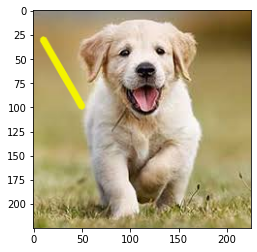

In [23]:
pup = cv2.imread('images/pup.jpg', 1)
pup_line = pup.copy()

cv2.line(pup_line, (10, 30), (50, 99), (0, 244, 244), thickness=5, lineType= cv2.LINE_AA)

plt.imshow(pup_line[:,:,::-1])

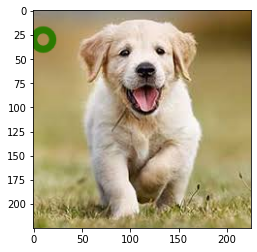

In [24]:
# img, center, radius, 
pup_circle = pup.copy()
cv2.circle(pup_circle, (10, 30), 10, (0, 122, 44), thickness=5, lineType= cv2.LINE_AA)
plt.imshow(pup_circle[:,:,::-1])

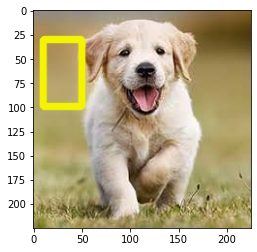

In [25]:
pup_rect = pup.copy()

cv2.rectangle(pup_rect, (10, 30), (50, 99), (0, 244, 244), thickness=5, lineType= cv2.LINE_AA)

plt.imshow(pup_rect[:,:,::-1])

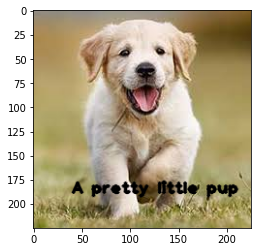

In [26]:
#text, org, fontface(type), fontscale
pup_text = pup.copy()
text = 'A pretty little pup'
fontScale = 1.1
fontFace = cv2.FONT_HERSHEY_PLAIN
fontthickness = 2

cv2.putText(pup_text, text, (40, 189), fontFace, fontScale, (0, 0, 0), fontthickness, lineType= cv2.LINE_AA)

plt.imshow(pup_text[:,:,::-1])

## Image Enhancement

Text(0.5, 1.0, 'Lighter')

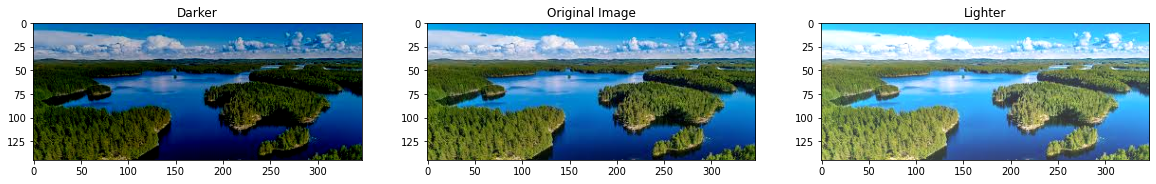

In [27]:
#addition or brightness
matrix = np.ones(scenary_rgb.shape, dtype = 'uint8')*50

scenary_rgb_brighter = cv2.add(scenary_rgb, matrix)
scenary_rgb_darker = cv2.subtract(scenary_rgb, matrix)

plt.figure(figsize=[20,5]) 

plt.subplot(131)
plt.imshow(scenary_rgb_darker)
plt.title('Darker')

plt.subplot(132)
plt.imshow(scenary_rgb) 
plt.title('Original Image') 

plt.subplot(133) 
plt.imshow(scenary_rgb_brighter) 
plt.title('Lighter')



In [28]:
## contrast is the difference in intensity values of the pixels of a image

Text(0.5, 1.0, 'Higher Contrast')

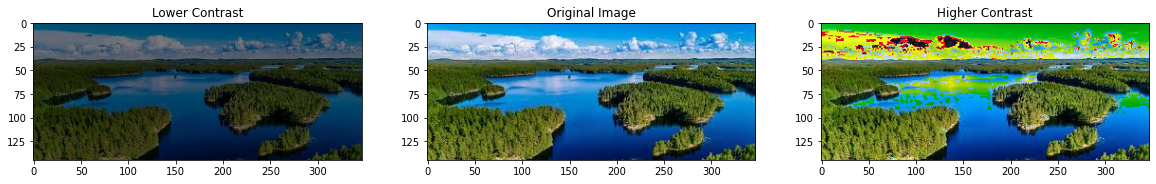

In [29]:
matrix1 = np.ones(scenary_rgb.shape)* .5
matrix2 = np.ones(scenary_rgb.shape)* 1.2

scenary_rgb_darker_c = np.uint8(cv2.multiply(np.float64(scenary_rgb), matrix1))
scenary_rgb_brighter_c = np.uint8(cv2.multiply(np.float64(scenary_rgb), matrix2))


plt.figure(figsize=[20,5]) 

plt.subplot(131)
plt.imshow(scenary_rgb_darker_c)
plt.title('Lower Contrast')

plt.subplot(132)
plt.imshow(scenary_rgb) 
plt.title('Original Image') 

plt.subplot(133) 
plt.imshow(scenary_rgb_brighter_c) 
plt.title('Higher Contrast')

### Multiplying pixels with 1.2 made some values close to 255 go over that and since we converted them to uint, they rolled over leading to brighter colors in the higher contrast image


## Hadling overflow using np.clip

Text(0.5, 1.0, 'Higher Contrast')

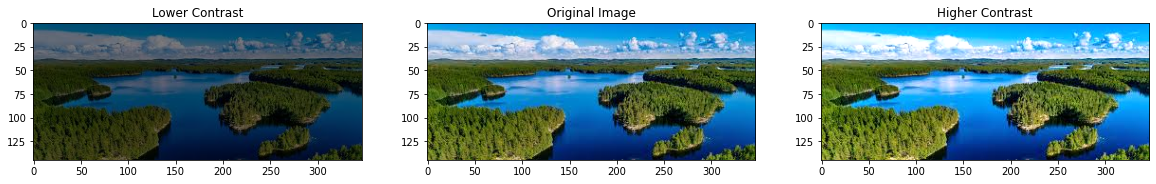

In [31]:
scenary_rgb_brighter_c_altered = np.uint8(np.clip(cv2.multiply(np.float64(scenary_rgb), matrix2), 0, 255))


plt.figure(figsize=[20,5]) 

plt.subplot(131)
plt.imshow(scenary_rgb_darker_c)
plt.title('Lower Contrast')

plt.subplot(132)
plt.imshow(scenary_rgb) 
plt.title('Original Image') 

plt.subplot(133) 
plt.imshow(scenary_rgb_brighter_c_altered) 
plt.title('Higher Contrast')

## Image Thresholding
'''
allows us to create binary images with selected portions procesed and the rest intact
'''

(280, 463)


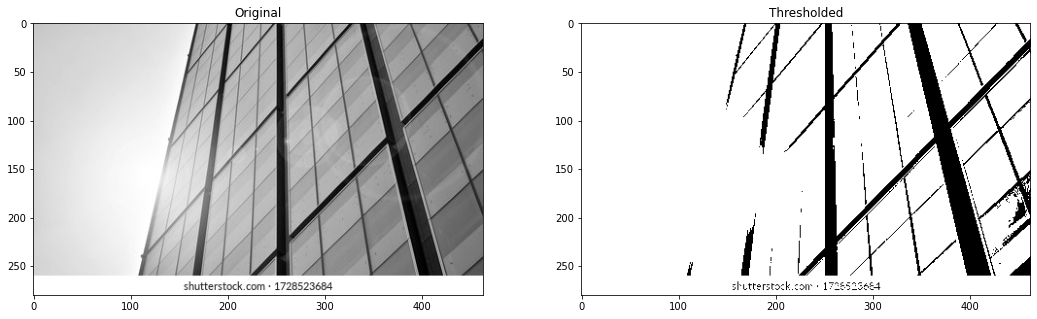

In [32]:
img_b = cv2.imread('images/building_window.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_b, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18,5])
plt.subplot(121)
plt.imshow(img_b, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_thresh, cmap='gray')
plt.title('Thresholded')

print(img_thresh.shape)

Text(0.5, 1.0, 'Thresholded Adaptive')

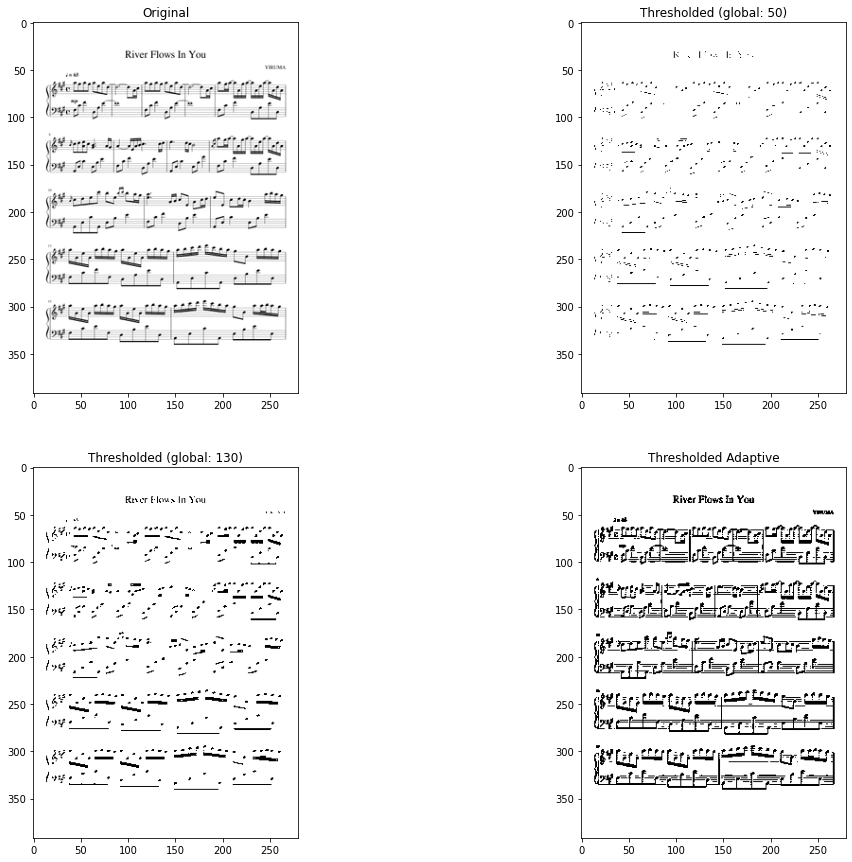

In [32]:
img_m = cv2.imread('music_notes.png', cv2.IMREAD_GRAYSCALE)
retval, img_thresh_m = cv2.threshold(img_m, 50, 255, cv2.THRESH_BINARY)
revtal, img_thresh_m1 = cv2.threshold(img_m, 130, 255, cv2.THRESH_BINARY)

img_thresh_adp = cv2.adaptiveThreshold(img_m, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221)
plt.imshow(img_m, cmap='gray')
plt.title('Original')

plt.subplot(222)
plt.imshow(img_thresh_m, cmap='gray')
plt.title('Thresholded (global: 50)')

plt.subplot(223)
plt.imshow(img_thresh_m1, cmap='gray')
plt.title('Thresholded (global: 130)')

plt.subplot(224)
plt.imshow(img_thresh_adp, cmap='gray')
plt.title('Thresholded Adaptive')



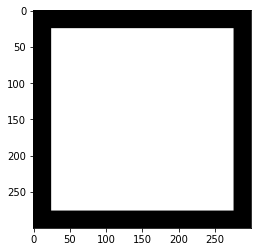

In [33]:
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
rec = cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB)
plt.imshow(rec)

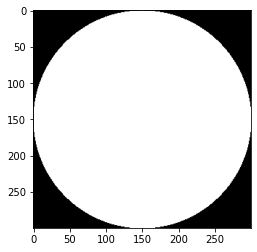

In [34]:
# draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
circle = cv2.cvtColor(circle, cv2.COLOR_BGR2RGB)
plt.imshow(circle)

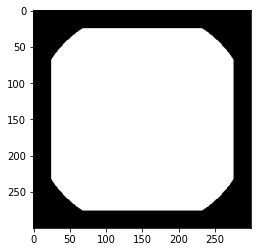

In [35]:
bitand = cv2.bitwise_and(rec, circle, mask=None)
plt.imshow(bitand)

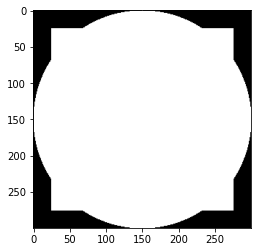

In [36]:
bitor = cv2.bitwise_or(rec, circle, mask=None)
plt.imshow(bitor)

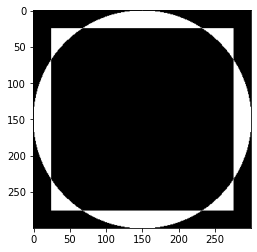

In [37]:
bitxor = cv2.bitwise_xor(rec, circle, mask=None)
plt.imshow(bitxor)

(175, 287, 3)


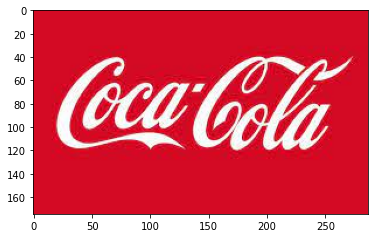

In [38]:
coca = cv2.imread('images/cocacola_logo.jpg')
coca = cv2.cvtColor(coca, cv2.COLOR_BGR2RGB)
plt.imshow(coca)
print(coca.shape)

logo_w = coca.shape[0]
logo_h = coca.shape[1]


(175, 287, 3)


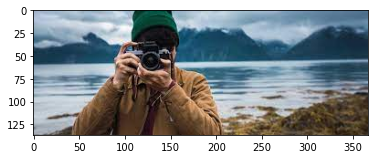

In [39]:
img = cv2.imread('images/img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# aspect_ratio = logo_w/img.shape[1]
# dim = (logo_w, int(img.shape[0]*aspect_ratio))

img = cv2.resize(img, (logo_h, logo_w), interpolation=cv2.INTER_AREA)

print(img.shape)

(175, 287)


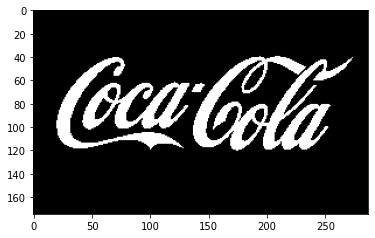

In [40]:
coca_gray = cv2.cvtColor(coca, cv2.COLOR_RGB2GRAY)

retval, coca_mask = cv2.threshold(coca_gray, 133, 255, cv2.THRESH_BINARY)

plt.imshow(coca_mask, cmap='gray')
print(coca_mask.shape)

### inverse mask

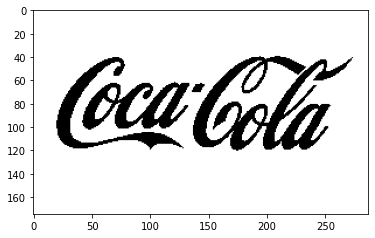

In [41]:
coca_mask_inv = cv2.bitwise_not(coca_mask)
plt.imshow(coca_mask_inv, cmap='gray')

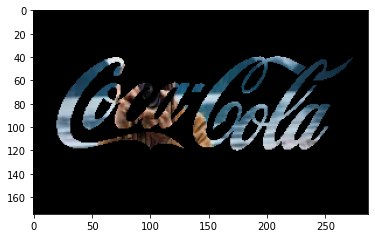

In [42]:
img_background = cv2.bitwise_and(img, img, mask=coca_mask)
plt.imshow(img_background)

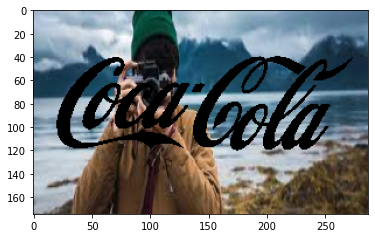

In [43]:
img_foregroud = cv2.bitwise_and(img, img, mask=coca_mask_inv)
plt.imshow(img_foregroud)